## <font color= green > World Internet Penetration in 2021 </font>

The markdown below shows the number of internet in subscribers in the world in 2021  

Web scrapping using pandas' read_HTML.

Data set from Wikipedia [link](https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users)

### Data Extraction 

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup # library to parse HTML documents
%matplotlib inline


In [56]:

wiki_url="https://en.wikipedia.org/wiki/List_of_countries_by_number_of_Internet_users"
response=requests.get(wiki_url)
print(response.status_code)

200


In [57]:
df=pd.read_html(wiki_url)
# convert list to dataframe
# the table is the 5th table in the wiki webpage
tb=(df[5])
df[5].to_csv('int.csv')



In [58]:
tb


,Country or area,Subregion,Region,Internet users,Unnamed: 4,Population.mw-parser-output .nobold{font-weight:normal}(2018)[13][14],Sources,Year
0,China,Eastern Asia,Asia,1010740000,NaN,1.427648e+09,[15],2021
1,India,Southern Asia,Asia,833710000,NaN,1.352642e+09,[16],2021
2,United States,Northern America,Americas,312320000,NaN,3.270963e+08,[17],2021
3,Indonesia,South-eastern Asia,Asia,202000000,NaN,2.676705e+08,[18][19],2020
4,Brazil,South America,Americas,160000000,NaN,2.094693e+08,[20],2021
...,...,...,...,...,...,...,...,...
209,"Saint Helena, Ascension and Tristan da Cunha",Western Africa,Africa,2906,NaN,6.035000e+03,[228],2021
210,Falkland Islands,South America,Americas,2881,NaN,3.234000e+03,[229],2021
211,Montserrat,Caribbean,Americas,2806,NaN,4.993000e+03,[230],2021
212,Wallis and Futuna,Polynesia,Oceania,1383,NaN,1.166100e+04,[231],2021


### Data Cleaning 

In [59]:
# We will first rename the column "Population.mw-parser-output .nobold{font-weight:normal}(2018)[13][14]" which shows the population of each country
# delete drop sources 
#delete Unnamed 4
tb.rename(columns={'Population.mw-parser-output .nobold{font-weight:normal}(2018)[13][14]': 'Population'}, inplace = True)
tb.rename(columns={'Unnamed: 4': 'P1'}, inplace = True)

del tb['P1']
del tb['Sources']
# set country/area as index
tb.set_index('Country or area', inplace=True)
# format Internet population and population to the nearest thousand

tb['Population']=(tb['Population']/1000)
tb['Internet users']=(tb['Internet users']/1000)
tb

,Subregion,Region,Internet users,Population,Year
Country or area,,,,,
China,Eastern Asia,Asia,1010740.000,1427647.786,2021
India,Southern Asia,Asia,833710.000,1352642.280,2021
United States,Northern America,Americas,312320.000,327096.265,2021
Indonesia,South-eastern Asia,Asia,202000.000,267670.543,2020
Brazil,South America,Americas,160000.000,209469.323,2021
...,...,...,...,...,...
"Saint Helena, Ascension and Tristan da Cunha",Western Africa,Africa,2.906,6.035,2021
Falkland Islands,South America,Americas,2.881,3.234,2021
Montserrat,Caribbean,Americas,2.806,4.993,2021


In [60]:
#Finding all rows that whose data are not from 2021

tb.loc[tb['Year']!=2021]


,Subregion,Region,Internet users,Population,Year
Country or area,,,,,
Indonesia,South-eastern Asia,Asia,202000.0,267670.543,2020
Nigeria,Western Africa,Africa,104000.0,195874.685,2020
Iran,Southern Asia,Asia,59160.0,81800.188,2020
Turkey,Southern Europe,Europe,65800.0,82340.088,2022
Thailand,South-eastern Asia,Asia,48590.0,69428.453,2020
Poland,Eastern Europe,Europe,31970.0,37921.592,2020
Ukraine,Eastern Europe,Europe,29470.0,44246.156,2022


In [61]:
# Dropping these rows in order to have an accurate data 

df=tb.drop(labels=['Indonesia', 'Nigeria', 'Poland', 'Turkey','Ukraine','Iran','Thailand'])
df

,Subregion,Region,Internet users,Population,Year
Country or area,,,,,
China,Eastern Asia,Asia,1010740.000,1427647.786,2021
India,Southern Asia,Asia,833710.000,1352642.280,2021
United States,Northern America,Americas,312320.000,327096.265,2021
Brazil,South America,Americas,160000.000,209469.323,2021
Bangladesh,Southern Asia,Asia,47600.000,166303.498,2021
...,...,...,...,...,...
"Saint Helena, Ascension and Tristan da Cunha",Western Africa,Africa,2.906,6.035,2021
Falkland Islands,South America,Americas,2.881,3.234,2021
Montserrat,Caribbean,Americas,2.806,4.993,2021


In [62]:
# Confirming that the countries have been dropped
df.loc[tb['Year']!=2021]

,Subregion,Region,Internet users,Population,Year
Country or area,,,,,


In [64]:
#viewing cleaned excel
df.to_csv('cleaned.csv')

### Data Transformation

In [65]:
# We will calcuate for a new column "Users per population" in percentage, these shows the percentage of users with respect to the country's or areas' population to the nearest whole number 

users_pop= ((df['Internet users']/df ['Population'])*100).round(0)
users_pop



Country or area
China                                           71.0
India                                           62.0
United States                                   95.0
Brazil                                          76.0
Bangladesh                                      29.0
                                                ... 
Saint Helena, Ascension and Tristan da Cunha    48.0
Falkland Islands                                89.0
Montserrat                                      56.0
Wallis and Futuna                               12.0
Niue                                            79.0
Length: 207, dtype: float64

In [66]:
# We will insert the new column here

df['Users per population']= ((df['Internet users']/df ['Population'])*100)
df

,Subregion,Region,Internet users,Population,Year,Users per population
Country or area,,,,,,
China,Eastern Asia,Asia,1010740.000,1427647.786,2021,70.797574
India,Southern Asia,Asia,833710.000,1352642.280,2021,61.635660
United States,Northern America,Americas,312320.000,327096.265,2021,95.482594
Brazil,South America,Americas,160000.000,209469.323,2021,76.383500
Bangladesh,Southern Asia,Asia,47600.000,166303.498,2021,28.622368
...,...,...,...,...,...,...
"Saint Helena, Ascension and Tristan da Cunha",Western Africa,Africa,2.906,6.035,2021,48.152444
Falkland Islands,South America,Americas,2.881,3.234,2021,89.084725
Montserrat,Caribbean,Americas,2.806,4.993,2021,56.198678


In [98]:
df.max()

Subregion               Western Europe
Region                         Oceania
Internet users               1010740.0
Population                 1427647.786
Year                              2021
Users per population        108.955644
dtype: object

## Data Analysis/Visualization

In [67]:
# Below shows the statistic measures for the data set
df.describe()

,Internet users,Population,Year,Users per population
count,2.070000e+02,2.050000e+02,207.0,205.000000
mean,2.123370e+04,3.330307e+04,2021.0,61.823522
std,9.460713e+04,1.407557e+05,0.0,27.764243
min,1.286000e+00,1.620000e+00,2021.0,1.964596
25%,3.542280e+02,7.790060e+02,2021.0,36.919689
50%,3.083783e+03,6.420746e+03,2021.0,67.912410
75%,9.005000e+03,1.950611e+04,2021.0,84.253645
max,1.010740e+06,1.427648e+06,2021.0,108.955644


<AxesSubplot:xlabel='Country or area'>

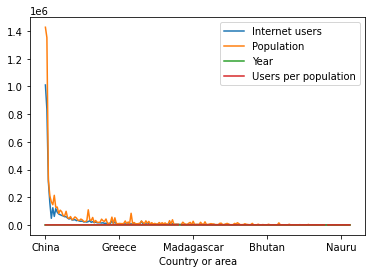

In [68]:
# This graph was created using pandas inbuilt plot function allowing it not to show much 
df.plot()

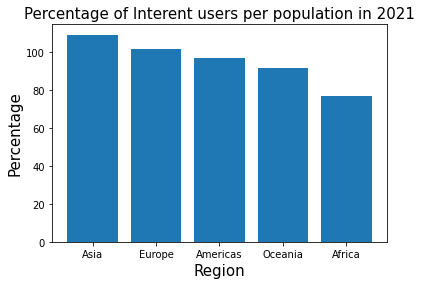

In [92]:
#These shows the percentage of internet users per population in each region

fig, ax = plt.subplots()
df=df.sort_values('Users per population', ascending=False)
ax.bar(df['Region'], df['Users per population'])
ax.set_title('Percentage of Interent users per population in 2021', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_xlabel('Region', fontsize=15)

#Saving the graph 
plt.savefig('World_int.jpg', bbox_inches='tight')

plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


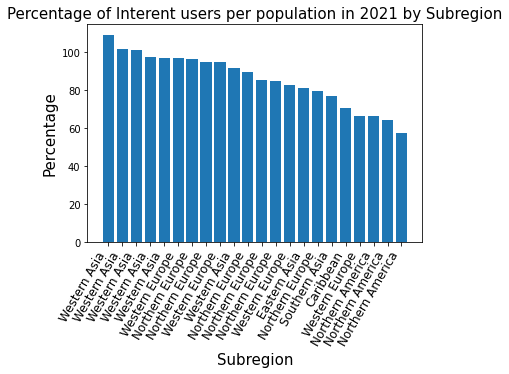

In [108]:
#These shows the percentage of internet users per population in each subregion

fig, ax = plt.subplots()
df=df.sort_values('Users per population', ascending=False)
ax.bar(df['Subregion'], df['Users per population'])
ax.set_title('Percentage of Interent users per population in 2021 by Subregion', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_xlabel('Subregion', fontsize=15)
ax.set_xticklabels(df['Subregion'], rotation=60, horizontalalignment = 'right', fontsize ='12')
#Saving the graph 
plt.savefig('World_int2.jpg', bbox_inches='tight')

plt.show()